In [ ]:
! pip install lifetimes

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import calendar
import scipy.stats as stats
from scipy.stats import f_oneway
from lifetimes import BetaGeoFitter

%matplotlib inline

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Projects/Data Analyst/Online Retail.xlsx')

# Data Exploration

In [3]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.isnull().sum()/len(df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [19]:
df = df.dropna() # remove missing values

In [20]:
df= df.drop_duplicates()

In [21]:
df.isnull().sum()/len(df) #check if any missing values

InvoiceNo        0.0
StockCode        0.0
Description      0.0
Quantity         0.0
InvoiceDate      0.0
UnitPrice        0.0
CustomerID       0.0
Country          0.0
Invoice_Month    0.0
dtype: float64

# Feature Engineering

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Invoice_Month'] = df['InvoiceDate'].dt.month
df['Invoice_Month_Name'] = df['InvoiceDate'].dt.month.apply(lambda x: calendar.month_name[x])

In [31]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,Total_Sales,Invoice_Month_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,December


## User Behaviour Metrics

In [32]:
df['Total_Sales'] = df['Quantity'] * df['UnitPrice']

In [33]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,Total_Sales,Invoice_Month_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.3,December


# Exploratory Data Analysis

Text(0.5, 1.0, 'Monthly Sales')

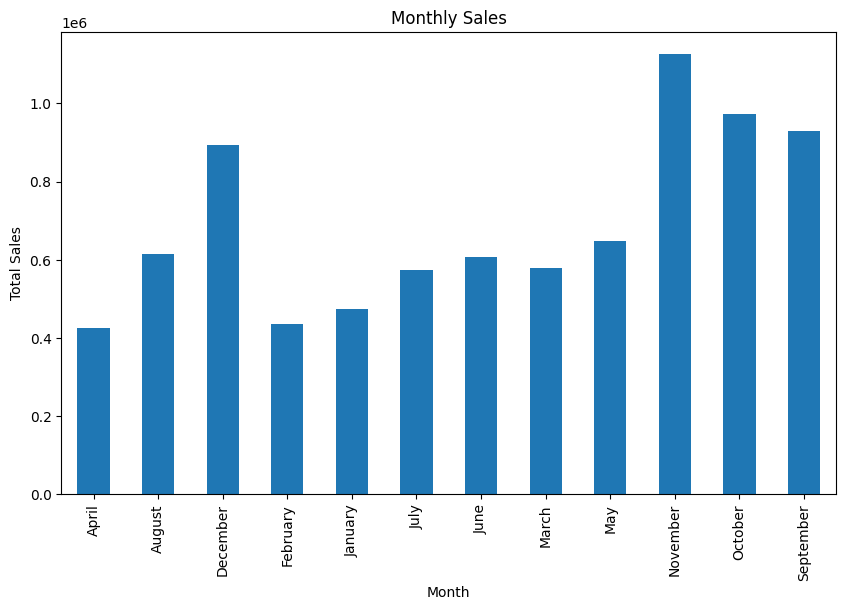

In [34]:
monthly_sales = df.groupby('Invoice_Month_Name')['Total_Sales'].sum()
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')

# Customer Segmentation (RFM Analysis)

In [35]:
# Calculate recency
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (df['InvoiceDate'].max() - recency['InvoiceDate']).dt.days

recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277
4368,18281.0,2011-06-12 10:53:00,180
4369,18282.0,2011-12-02 11:43:00,7
4370,18283.0,2011-12-06 12:02:00,3


In [37]:
# Calculate frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [39]:
# Calculate monetary frequency
monetary = df.groupby('CustomerID')['Total_Sales'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [42]:
# Merge the recency, frequency and monetary datasets
rfm_df = pd.merge(recency, frequency, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary, on='CustomerID')

rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53


In [77]:
rfm_df.to_excel('RFM_data.xlsx')

## K-Means clustering

In [44]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

rfm_scaled

array([[ 2.32202285, -0.32936215, -0.23041952],
       [-0.89373323,  0.20610242,  0.29405454],
       [-0.1691956 , -0.11517632, -0.01171748],
       ...,
       [-0.83418219, -0.22226923, -0.20892947],
       [-0.87388289,  1.16993863,  0.01849636],
       [-0.48680114, -0.22226923, -0.00684511]])

In [ ]:
# Determing optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

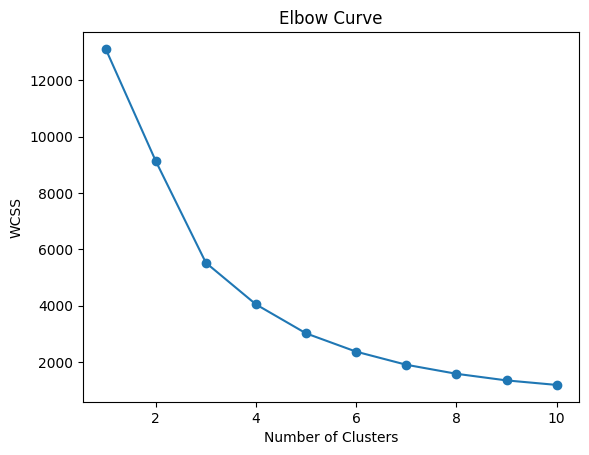

In [46]:
# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [47]:
# Choosing k = 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [49]:
# Assigning cluster labels to the data
rfm_df['Cluster'] = kmeans.labels_

In [50]:
rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster
0,12346.0,2011-01-18 10:17:00,325,2,0.00,0
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,4
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,4
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4
4,12350.0,2011-02-02 16:01:00,309,1,334.40,0
...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,0
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,0
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,4
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53,1


# Statistical analysis

<Axes: xlabel='Cluster', ylabel='Monetary'>

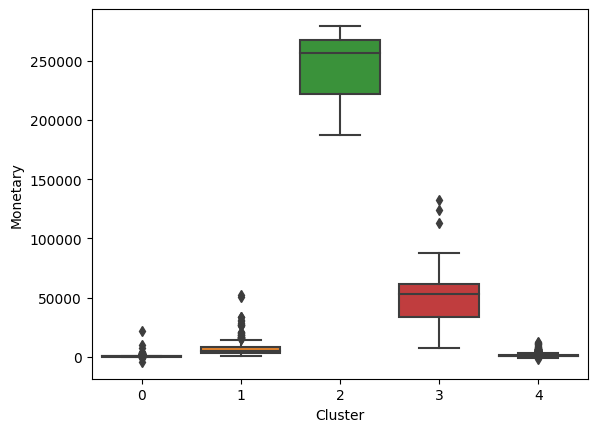

In [51]:
# CLuster Comparison based on 'Monetary' metric
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df)

In [53]:
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster')
fig.update_layout(title='RFM Segmentation', scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))
fig.show()

In [54]:
# Interactive Bar Plot of Cluster Sizes
cluster_sizes = rfm_df['Cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'Count']
fig = px.bar(cluster_sizes, x='Cluster', y='Count', color='Cluster')
fig.update_layout(title='Cluster Sizes', xaxis_title='Cluster', yaxis_title='Count')
fig.show()

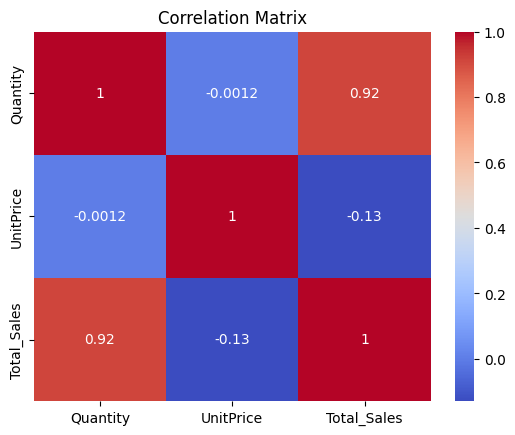

In [56]:
# Correlation Analysis
correlation_matrix = df[['Quantity', 'UnitPrice', 'Total_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
# Hypothesis Testing
group1 = df[df['Country'] == 'United Kingdom']['Total_Sales']
group2 = df[df['Country'] != 'United Kingdom']['Total_Sales']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: -7.056954296353999
P-Value: 1.7046498163041003e-12


In [65]:
rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster
0,12346.0,2011-01-18 10:17:00,325,2,0.00,0
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,4
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,4
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,4
4,12350.0,2011-02-02 16:01:00,309,1,334.40,0
...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60,0
4368,18281.0,2011-06-12 10:53:00,180,1,80.82,0
4369,18282.0,2011-12-02 11:43:00,7,3,176.60,4
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53,1
